In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
from pathlib import Path
from nuztf.neutrino_scanner import NeutrinoScanner
import numpy as np

In [16]:
source_name = "PKS 0446+11"
source_z = 2.153
neutrino_name = "IC240105A"

In [17]:
data_name = "lc_WNTR24aabfj_72.2821_11.358_diff.csv"

In [36]:
# ZTF data
ztf_df = pd.read_csv(Path.home().joinpath(f"Downloads/ic240105a.csv"))
mask = pd.notnull(ztf_df["mag"]) & ztf_df["origin"] != "fp" 
ztf_df = ztf_df[mask]
ztf_df = ztf_df[ztf_df["mjd"] > 60280.]

df = pd.read_csv(Path.home().joinpath(f"Downloads/{data_name}"))
nu = NeutrinoScanner(neutrino_name)
scale = cosmo.luminosity_distance(source_z).to("Mpc")
dm = -5.*np.log10(scale/(10*u.pc))

{'node': {'id': 'Q2lyY3VsYXI6MzU1ODQ=', 'id_': '35584', 'received': '2024-01-19T22:13:46', 'subject': 'IceCube-240105A: Detection of NIR flare of PKS 0446+11 with WINTER', 'evtidCircular': {'event': 'IC 240105A'}, 'cid': 35584, 'evtid': 200242, 'oidCircular': {'telescope': None, 'detector': None, 'oidEvent': {'wavelength': None, 'messenger': None}}}}
{'node': {'id': 'Q2lyY3VsYXI6MzU1NDg=', 'id_': '35548', 'received': '2024-01-16T20:09:30', 'subject': 'IceCube-240105A: ZTF optical observation of blazar PKS 0446+11', 'evtidCircular': {'event': 'IC 240105A'}, 'cid': 35548, 'evtid': 200242, 'oidCircular': {'telescope': 'ZTF', 'detector': None, 'oidEvent': {'wavelength': 'optical', 'messenger': 'EM'}}}}
{'node': {'id': 'Q2lyY3VsYXI6MzU1MTc=', 'id_': '35517', 'received': '2024-01-10T15:47:25', 'subject': 'Fermi-LAT detection of increased gamma-ray activity of blazar PKS 0446+11, located inside the IceCube-240105A error region', 'evtidCircular': {'event': 'IC 240105A'}, 'cid': 35517, 'evtid':

100%|███████████████████████████████| 196608/196608 [00:01<00:00, 174046.83it/s]


In [19]:
[x for x in df.columns]

['ra',
 'dec',
 'xpos',
 'ypos',
 'fluxap5',
 'fluxuncap5',
 'magap5',
 'sigmagap5',
 'fluxap8',
 'fluxuncap8',
 'magap8',
 'sigmagap8',
 'fluxap10',
 'fluxuncap10',
 'magap10',
 'sigmagap10',
 'fluxap15',
 'fluxuncap15',
 'magap15',
 'sigmagap15',
 'psfflux',
 'psffluxunc',
 'chipsf',
 'xshift',
 'yshift',
 'magpsf',
 'sigmapsf',
 'DATE-OBS',
 'imagename',
 'FILTER',
 'MJD']

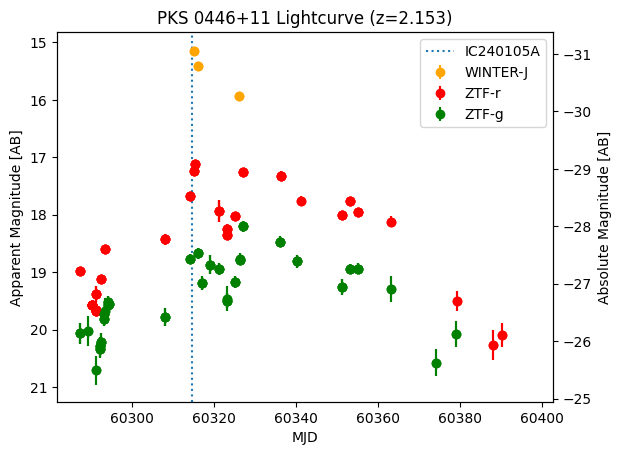

In [40]:
colors = {
    "J": "orange",
    "ztfg": "g",
    "ztfr": "r"
}


plt.figure()

ax = plt.subplot(111)
ax2 = ax.twinx()

for filt in set(df["FILTER"]):
    df_cut = df[df["FILTER"] == filt]
    
    color = colors[filt]
    
    ax.errorbar(df_cut["MJD"], df_cut["magpsf"], yerr=df_cut["sigmapsf"], color=color, linestyle=" ", fmt="o", label=f"WINTER-{filt}")
    ax2.errorbar(df_cut["MJD"], df_cut["magpsf"] + dm, yerr=df_cut["sigmapsf"], color=color, linestyle=" ", fmt="o")


for filt in set(ztf_df["filter"]):
    df_cut = ztf_df[ztf_df["filter"] == filt]
    color = colors[filt]
    ax.errorbar(df_cut["mjd"], df_cut["mag"], yerr=df_cut["magerr"], color=color, linestyle=" ", fmt="o", label=f"ZTF-{filt[-1]}")
    ax2.errorbar(df_cut["mjd"], df_cut["mag"] + dm, yerr=df_cut["magerr"], color=color, linestyle=" ", fmt="o")

ax.axvline(nu.t_min.mjd, linestyle=":", label=neutrino_name)
ax.legend()
ax.set_title(f"{source_name} Lightcurve (z={source_z})")
ax.invert_yaxis()
ax2.invert_yaxis()
ax.set_ylabel("Apparent Magnitude [AB]")
ax2.set_ylabel("Absolute Magnitude [AB]")
ax.set_xlabel("MJD")
plt.savefig(f"{source_name.replace(' ', '')}.pdf")

,id,mjd,mag,magerr,limiting_mag,filter,instrument_name,instrument_id,magsys,origin,...,ra,dec,ra_unc,dec_unc,created_at,streams,owner,flux,fluxerr,snr
468,519262017,60287.210752,20.067709,0.174524,20.304955,ztfg,ZTF,1,ab,None,...,72.282008,11.358013,NaN,NaN,2023-12-09T05:19:51.003724,NaN,NaN,34.112717,5.483373,6.221119
469,519323570,60287.210752,20.067700,0.174524,20.304948,ztfg,ZTF,1,ab,None,...,72.282008,11.358013,NaN,NaN,2023-12-09T07:13:17.858377,NaN,NaN,34.113018,5.483413,6.221129
470,520803440,60287.289491,18.986401,0.082746,20.033919,ztfr,ZTF,1,ab,None,...,72.281999,11.357917,NaN,NaN,2023-12-12T08:09:33.915411,NaN,NaN,92.350594,7.038213,13.121314
471,519323571,60287.289491,18.986391,0.082746,20.033911,ztfr,ZTF,1,ab,None,...,72.281999,11.357917,NaN,NaN,2023-12-09T07:13:17.858429,NaN,NaN,92.351402,7.038261,13.121337
472,520803441,60289.211678,20.027901,0.257986,19.840796,ztfg,ZTF,1,ab,None,...,72.281978,11.358021,NaN,NaN,2023-12-12T08:09:33.915470,NaN,NaN,35.386662,8.408362,4.208508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,548472251,60390.138090,20.090604,0.212422,19.659400,ztfr,ZTF,1,ab,fp,...,NaN,NaN,NaN,NaN,2024-03-30T22:15:26.504761,NaN,NaN,33.400913,6.534826,5.111217
579,548472252,60390.178275,NaN,NaN,19.190600,ztfg,ZTF,1,ab,fp,...,NaN,NaN,NaN,NaN,2024-03-30T22:15:26.504778,NaN,NaN,NaN,76.517364,NaN
580,548472253,60392.154074,NaN,NaN,18.813600,ztfr,ZTF,1,ab,fp,...,NaN,NaN,NaN,NaN,2024-03-30T22:15:26.504794,NaN,NaN,NaN,108.282930,NaN
581,548472254,60392.186956,NaN,NaN,18.291500,ztfg,ZTF,1,ab,fp,...,NaN,NaN,NaN,NaN,2024-03-30T22:15:26.504809,NaN,NaN,NaN,175.145910,NaN
